<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/hreczany/entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

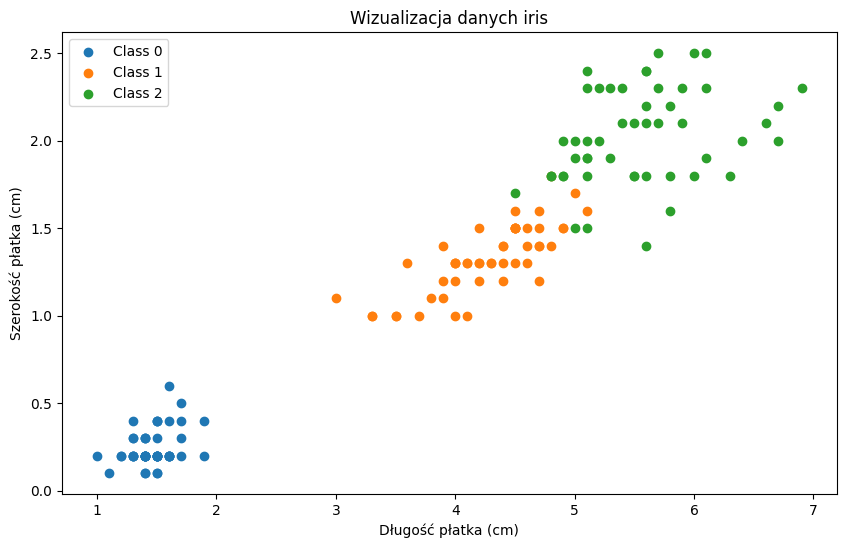

In [ ]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Wizualizacja danych
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(X[y == i]['petal length (cm)'], X[y == i]['petal width (cm)'], label=f'Class {i}')
plt.xlabel('Długość płatka (cm)')
plt.ylabel('Szerokość płatka (cm)')
plt.title('Wizualizacja danych iris')
plt.legend()
plt.show()

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(X, y, feature_name, threshold):
    entropy_before = entropy(y)

    left_mask = X[feature_name] <= threshold
    right_mask = ~left_mask

    left_entropy = entropy(y[left_mask])
    right_entropy = entropy(y[right_mask])

    proportion_left = np.sum(left_mask) / len(y)
    proportion_right = 1 - proportion_left

    information_gain = entropy_before - (proportion_left * left_entropy + proportion_right * right_entropy)

    return information_gain

threshold_a = 0.5
threshold_b = 0.38

information_gain_a = information_gain(X_train, y_train, 'petal width (cm)', threshold_a)
information_gain_b = information_gain(X_train, y_train, 'petal width (cm)', threshold_b)

print("Zysk informacyjny dla podziału a):", information_gain_a)
print("Zysk informacyjny dla podziału b):", information_gain_b)

Zysk informacyjny dla podziału a): 0.8024218280548445
Zysk informacyjny dla podziału b): 0.6193014771561468


Dokładność drzewa decyzyjnego: 1.0
Dokładność lasu losowego: 1.0


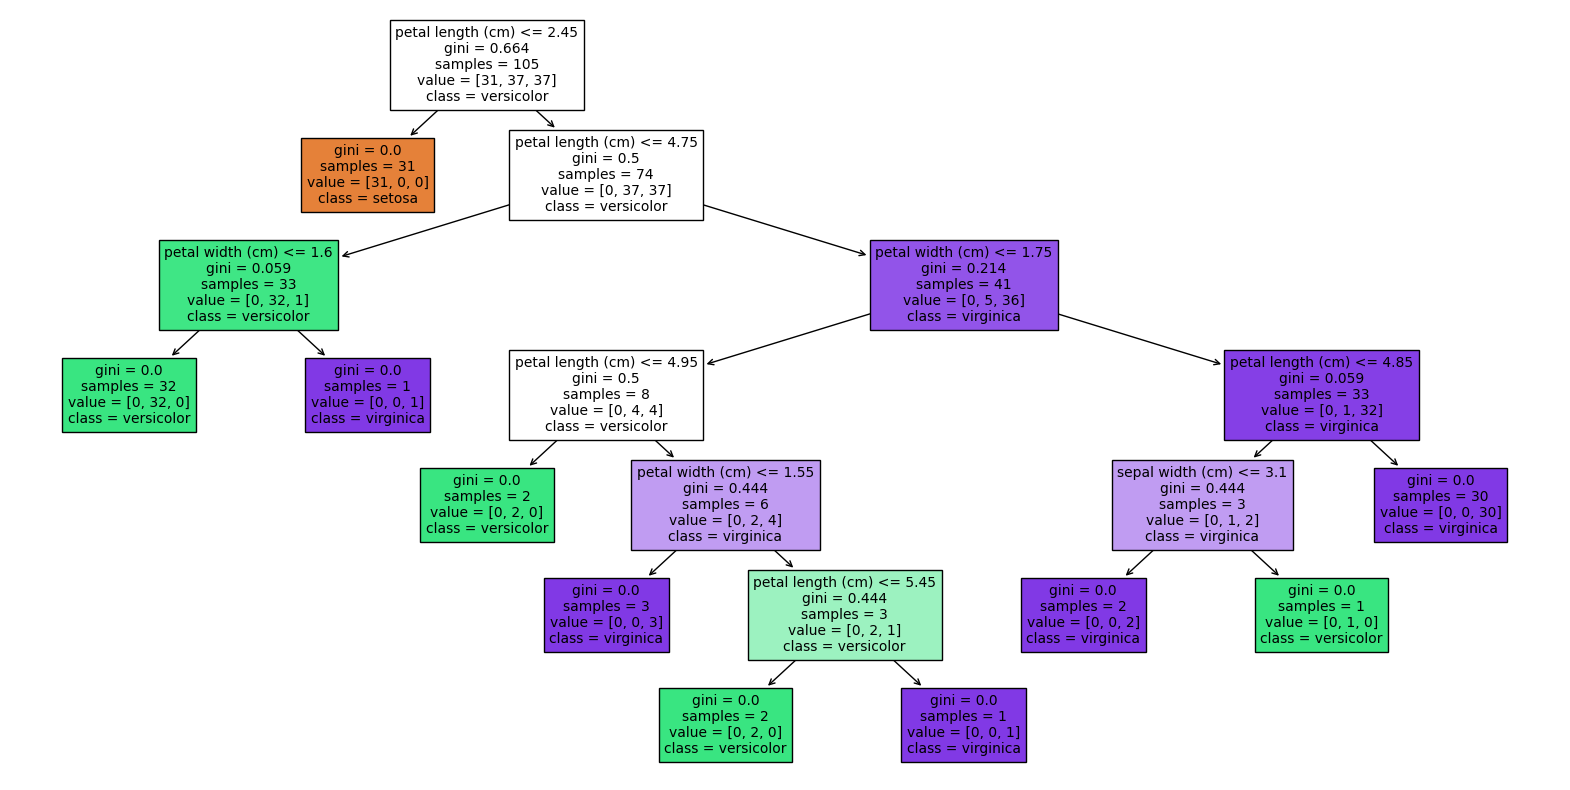

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Dokładność drzewa decyzyjnego:", accuracy_dt)

random_forest = RandomForestClassifier(n_estimators=15, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Dokładność lasu losowego:", accuracy_rf)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, fontsize=10)
plt.show()

In [ ]:
from collections import Counter

class_counts = Counter(y_train)
total_samples = len(y_train)
class_probabilities = [count / total_samples for count in class_counts.values()]


dataset_entropy = -np.sum([p * np.log2(p) for p in class_probabilities])

print("Entropia dla całego zestawu danych:", dataset_entropy)


Entropia dla całego zestawu danych: 1.5801537588229282


In [ ]:
feature_name = 'petal width (cm)'
threshold = 0.5
left_subset = y_train[X_train[feature_name] <= threshold]
right_subset = y_train[X_train[feature_name] > threshold]

left_class_counts = Counter(left_subset)
right_class_counts = Counter(right_subset)


left_total_samples = len(left_subset)
right_total_samples = len(right_subset)

left_class_probabilities = [count / left_total_samples for count in left_class_counts.values()]
right_class_probabilities = [count / right_total_samples for count in right_class_counts.values()]

left_entropy = -np.sum([p * np.log2(p) for p in left_class_probabilities if p != 0])
right_entropy = -np.sum([p * np.log2(p) for p in right_class_probabilities if p != 0])


total_samples = len(y_train)
total_entropy = (left_total_samples / total_samples) * left_entropy + (right_total_samples / total_samples) * right_entropy

print("Entropia po podziale:", total_entropy)


Entropia po podziale: 0.7777319307680837
